<a href="https://colab.research.google.com/github/meggilliam/datasets/blob/main/Project1_Group4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Source: [ICS.UCI.EDU](https://archive.ics.uci.edu/ml/datasets/Wine+Quality)

## **Set up the Environment and Import the Data**

In [13]:
# Setup the Environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, metrics
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix, plot_confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [2]:
# Import the Dataset for Red Wine - hosted on Github
#ahhhsnap. I imported this wrong the first time. Sorry y'all. -M
url = 'https://raw.githubusercontent.com/meggilliam/datasets/main/winequality-red.csv'
col_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
wine = pd.read_csv(url, sep = ";", quoting = 3)

## Leave all these extra quotation marks in here! It's messy, but it works.
feature_cols = ['"fixed acidity', '""volatile acidity""', '""citric acid""', '""residual sugar""', '""chlorides""', '""free sulfur dioxide""', '""total sulfur dioxide""', '""density""', '""pH""', '""sulphates""', '""alcohol""']
target_col = ['""quality"""']

wine.columns
wine.head()

,"""fixed acidity","""""volatile acidity""""","""""citric acid""""","""""residual sugar""""","""""chlorides""""","""""free sulfur dioxide""""","""""total sulfur dioxide""""","""""density""""","""""pH""""","""""sulphates""""","""""alcohol""""","""""quality"""""""
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## **Create a SVM**

In [33]:
# Run SVM
#Train test split
#split original dataset into input (X) and output (y) columns
#the last column is the target/output column
X = wine[feature_cols]       
Y = wine[target_col]                         

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = .3, random_state= 40)

supportModel = svm.SVC(kernel='rbf').fit(X_Train, Y_Train)

#print test accurancy and train accurancy
print("The test set accurancy is: {:.3f}". format(supportModel.score(X_Test, Y_Test)))
print("The train set accurancy is: {:.3f}". format(supportModel.score(X_Train, Y_Train)))

#compute min value per feature on training set
min_on_training = X_Train.min(axis=0)
#compute the range of each feature:max-min on training set
range_on_training = (X_Train - min_on_training).max(axis=0)

#subtract min and divide by range afterward, min=0 and max=1
X_Train_scaled = (X_Train - min_on_training)/range_on_training
print("Minimum for each feature\n", X_Train_scaled.min(axis=0))
print("Maximum for each feature\n", X_Train_scaled.max(axis=0))

# use THE SAME transformation on the test set,
# using min and range of the training set.
X_Test_scaled = (X_Test - min_on_training) / range_on_training

svc = svm.SVC()
svc.fit(X_Train_scaled, Y_Train.values.ravel())

print("Accuracy on training set: {:.3f}".format(svc.score(X_Train_scaled, Y_Train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_Test_scaled, Y_Test)))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The test set accurancy is: 0.487
The train set accurancy is: 0.514
Minimum for each feature
 "fixed acidity              0.0
""volatile acidity""        0.0
""citric acid""             0.0
""residual sugar""          0.0
""chlorides""               0.0
""free sulfur dioxide""     0.0
""total sulfur dioxide""    0.0
""density""                 0.0
""pH""                      0.0
""sulphates""               0.0
""alcohol""                 0.0
dtype: float64
Maximum for each feature
 "fixed acidity              1.0
""volatile acidity""        1.0
""citric acid""             1.0
""residual sugar""          1.0
""chlorides""               1.0
""free sulfur dioxide""     1.0
""total sulfur dioxide""    1.0
""density""                 1.0
""pH""                      1.0
""sulphates""               1.0
""alcohol""                 1.0
dtype: float64
Accuracy on training set: 0.648
Accuracy on test set: 0.621


## **Determine the most Influential Features with a Random Forest**

No handles with labels found to put in legend.


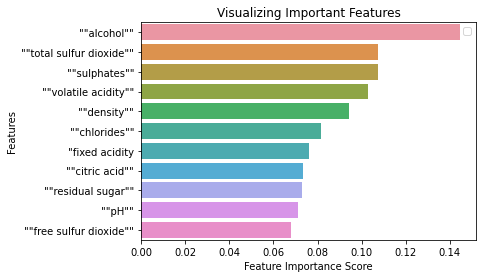

In [17]:
#Determine the two most influential Features
rfc = RandomForestClassifier(n_estimators = 1000)
rfc.fit(X_Train, Y_Train.values.ravel())
feature_imp = pd.Series(rfc.feature_importances_,index=feature_cols).sort_values(ascending=False)
feature_imp
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()


## **Create a Neural Network**

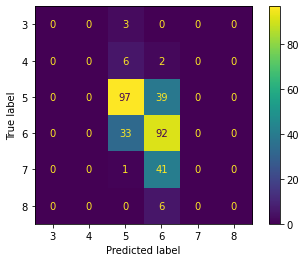

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         8
           5       0.69      0.71      0.70       136
           6       0.51      0.74      0.60       125
           7       0.00      0.00      0.00        42
           8       0.00      0.00      0.00         6

    accuracy                           0.59       320
   macro avg       0.20      0.24      0.22       320
weighted avg       0.49      0.59      0.53       320

Accuracy: 0.59


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
# Run NN -- 
# Scale the data
scaler = StandardScaler()
scaler.fit(X_Train)
X_TrainNN = scaler.transform(X_Train)   #Use the original train/test variables, but scale them into a Neural Network-Specific variable set
X_TestNN = scaler.transform(X_Test)

# Initializing the multilayer perceptron
mlp = MLPClassifier(hidden_layer_sizes=(100,),solver='adam',learning_rate_init= 0.01, max_iter=1000, early_stopping=True)

# Train the model
mlp.fit(X_TrainNN, Y_Train.values.ravel())

# Generate Predictions
predictions = mlp.predict(X_TestNN)
plot_confusion_matrix(mlp,X_TestNN,Y_Test)
plt.show()
print(classification_report(Y_Test,predictions))

Y_pred = mlp.predict(X_TestNN)
print('Accuracy: %.2f' % accuracy_score(Y_Test, Y_pred))

In [ ]:
# Run Third Algorithm